In [1]:
import pandas as pd

import numpy as np

import pandas_profiling as pdp

import os, sys


C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_9420\2791997659.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdp


In [2]:
data_path = os.path.join(r"../data/raw/data.csv")

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

# dropping unnecessay features like id and data

In [6]:
df = df.drop(labels=["ID", "Delivery_person_ID", "Order_Date"], axis=1)

In [7]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


# get null values and duplicate values

In [8]:
df[df.isnull()]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Time_Orderd                  43853 non-null  object 
 7   Time_Order_picked            45584 non-null  object 
 8   Weather_conditions           44968 non-null  object 
 9   Road_traffic_density         44983 non-null  object 
 10  Vehicle_condition            45584 non-null  int64  
 11  Type_of_order                45584 non-null  object 
 12  Type_of_vehicle              45584 non-null  object 
 13  multiple_deliver

In [10]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

# dropping all na values

> for float columns we can use median to fill the data in null values and for object we will use maximum occurance

since plenty of records available we are droping all NA to maintain actual data consistancy

> some of the lat long was 0

In [11]:
df["Delivery_person_Age"].count()

43730

In [12]:
df.dropna(inplace=True)




In [13]:
df["Delivery_person_Age"].count()

41359

In [14]:
df["Delivery_person_Age"].count()

41359

In [15]:
# recors will be droped
1854+1908+1731+616+601+993+228+1200

9131

In [16]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [17]:
df[df.duplicated()]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)


In [18]:
df.duplicated().sum()

0

In [19]:
# to drop duplicates
df = df.drop_duplicates()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41359 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          41359 non-null  float64
 1   Delivery_person_Ratings      41359 non-null  float64
 2   Restaurant_latitude          41359 non-null  float64
 3   Restaurant_longitude         41359 non-null  float64
 4   Delivery_location_latitude   41359 non-null  float64
 5   Delivery_location_longitude  41359 non-null  float64
 6   Time_Orderd                  41359 non-null  object 
 7   Time_Order_picked            41359 non-null  object 
 8   Weather_conditions           41359 non-null  object 
 9   Road_traffic_density         41359 non-null  object 
 10  Vehicle_condition            41359 non-null  int64  
 11  Type_of_order                41359 non-null  object 
 12  Type_of_vehicle              41359 non-null  object 
 13  multiple_deliver

In [21]:

# Convert coordinates to strings and split on dot separator
rlat_str = df['Restaurant_latitude'].astype(str)
rlat_parts = rlat_str.str.split('.')
rlon_str = df['Restaurant_longitude'].astype(str)
rlon_parts = rlon_str.str.split('.')


# Count the length of the parts before and after the dot separator
rlat_before = rlat_parts.str[0].str.len()
rlat_after = rlat_parts.str[1].str.len()
rlon_before = rlon_parts.str[0].str.len()
rlon_after = rlon_parts.str[1].str.len()




In [22]:
# Combine conditions to select invalid coordinates
rinvalid_coords = (rlat_before != 2) | (rlat_after != 6) | (rlon_before != 2) | (rlon_after != 6)

# Drop rows with invalid coordinates
df = df[~rinvalid_coords]

In [23]:
rinvalid_coords

0        False
1        False
2         True
3        False
4        False
         ...  
45579    False
45580     True
45581    False
45582    False
45583    False
Length: 41359, dtype: bool

In [24]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
5,29.0,4.5,19.176269,72.836721,19.266269,72.926721,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20


In [25]:
tsmp = []
for i in rlat_after:
    if i < 6 :
        tsmp.append(i)
        # print(True)

tsmp2 = []
for i in rlon_after:
    if i < 6 :
        tsmp2.append(i)
        # print(True)

len(tsmp) , len(tsmp2)

(7352, 6645)

In [26]:

dlat_str = df['Delivery_location_latitude'].astype(str)
dlat_parts = dlat_str.str.split('.')
dlon_str = df['Delivery_location_longitude'].astype(str)
dlon_parts = dlon_str.str.split('.')

dlat_before = dlat_parts.str[0].str.len()
dlat_after = dlat_parts.str[1].str.len()
dlon_before = dlon_parts.str[0].str.len()
dlon_after = dlon_parts.str[1].str.len()

In [27]:
# Combine conditions to select invalid coordinates
dinvalid_coords = (dlat_before != 2) | (dlat_after != 6) | (dlon_before != 2) | (dlon_after != 6)

# Drop rows with invalid coordinates
df = df[~dinvalid_coords]

In [28]:
tsmp = []
for i in dlat_after:
    if i < 6 :
        tsmp.append(i)
        # print(True)

len(tsmp)

tsmp2 = []
for i in dlon_after:
    if i < 6 :
        tsmp2.append(i)
        # print(True)

len(tsmp) , len(tsmp2)

(81, 0)

In [29]:
7352+6645+7433+6591 # records to delete

28021

In [30]:
41359 - 28021 # will be retain records

13338

In [31]:
df["Restaurant_latitude"].info()

<class 'pandas.core.series.Series'>
Int64Index: 30595 entries, 0 to 45583
Series name: Restaurant_latitude
Non-Null Count  Dtype  
--------------  -----  
30595 non-null  float64
dtypes: float64(1)
memory usage: 478.0 KB


In [32]:
df.to_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\raw_data_clean.csv")

In [33]:
len(df["Time_Orderd"][0])

5

In [34]:
# Create a boolean mask for invalid time formats
invalid_time = (~df['Time_Orderd'].str.contains(':')) | (df['Time_Orderd'].str.len() != 5)

# Drop rows with invalid time formats
df = df[~invalid_time]


In [35]:
# Create a boolean mask for invalid time formats
invalid_time = (~df['Time_Order_picked'].str.contains(':')) | (df['Time_Order_picked'].str.len() != 5)

# Drop rows with invalid time formats
df = df[~invalid_time]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24728 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          24728 non-null  float64
 1   Delivery_person_Ratings      24728 non-null  float64
 2   Restaurant_latitude          24728 non-null  float64
 3   Restaurant_longitude         24728 non-null  float64
 4   Delivery_location_latitude   24728 non-null  float64
 5   Delivery_location_longitude  24728 non-null  float64
 6   Time_Orderd                  24728 non-null  object 
 7   Time_Order_picked            24728 non-null  object 
 8   Weather_conditions           24728 non-null  object 
 9   Road_traffic_density         24728 non-null  object 
 10  Vehicle_condition            24728 non-null  int64  
 11  Type_of_order                24728 non-null  object 
 12  Type_of_vehicle              24728 non-null  object 
 13  multiple_deliver

In [37]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
5,29.0,4.5,19.176269,72.836721,19.266269,72.926721,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20


In [38]:
df.to_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\raw_data_clean.csv")

> splitting time with hour and mints

In [39]:
df[['Time_Orderd_hour', 'Time_Orderd_minute']] = df['Time_Orderd'].str.split(':', expand=True)

df["Time_Order_picked"][0].split(":")

df[['Time_Order_picked_hour']] = df["Time_Order_picked"][0].split(":")[0]
df[['Time_Order_picked_minute']] = df["Time_Order_picked"][0].split(":")[1]

df = df.drop(labels=["Time_Orderd", "Time_Order_picked"], axis=1)

df.to_csv(r"../../deliverytime_ML_model\data\processed\final_processed_data.csv", index=False)

df.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,22,10
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09,20,22,10
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,22,10
5,29.0,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,25,22,10


In [40]:
del df

# reading clean CSV data

In [41]:
df = pd.read_csv(r"../../deliverytime_ML_model\data\processed\final_processed_data.csv")

In [42]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,22,10
2,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,20,22,10
3,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,22,10
4,29.0,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,25,22,10


> plot graphs

In [43]:
# # Generate a profile report
# report = pdp.ProfileReport(df)

# # Save the report as an HTML file
# report.to_file(r'D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\reports\tips_report.html')

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

# constructing pipeline for numerical and catagorical columns

> numerical columns

In [45]:
# Select numerical features
num_features = df.select_dtypes(include=['int64', 'float64'])

In [46]:
# Select categorical features
cat_features = df.select_dtypes(include=['object'])

In [47]:
# Print the results
print("Numerical Features:")
print(num_features.columns)
print("\nCategorical Features:")
print(cat_features.columns)

Numerical Features:
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_Orderd_hour',
       'Time_Orderd_minute', 'Time_Order_picked_hour',
       'Time_Order_picked_minute'],
      dtype='object')

Categorical Features:
Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [48]:
# for i in num_features.columns:
#     print("column name:",i)
#     sns.histplot(data=num_features[i],kde=True)
#     plt.show()
#     print("---"*70,"\n")


> catogerical features

In [49]:
# for i in cat_features:

#     sns.catplot(y=cat_features[i],x=num_features["Delivery_person_Age"])
    
#     sns.catplot(y=cat_features[i],x=num_features["Delivery_person_Ratings"])

#     sns.catplot(y=cat_features[i],x=num_features["Vehicle_condition"])

#     sns.catplot(y=cat_features[i],x=num_features["multiple_deliveries"])

#     sns.catplot(y=cat_features[i],x=num_features["Time_taken (min)"])
#     plt.show()
#     print("-=:=-"*20,"\n")

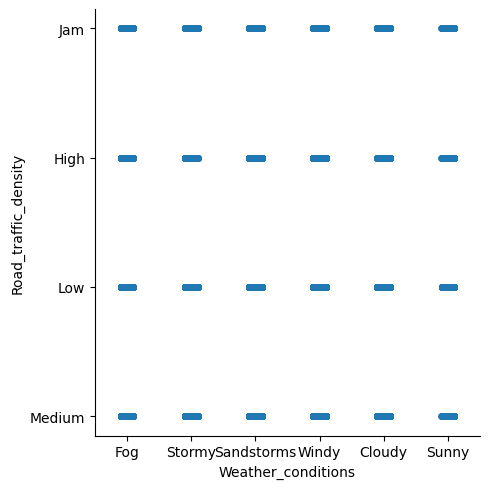

In [50]:
sns.catplot(y=cat_features["Road_traffic_density"],x=cat_features["Weather_conditions"])

# within cata data 

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_9420\2587472043.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


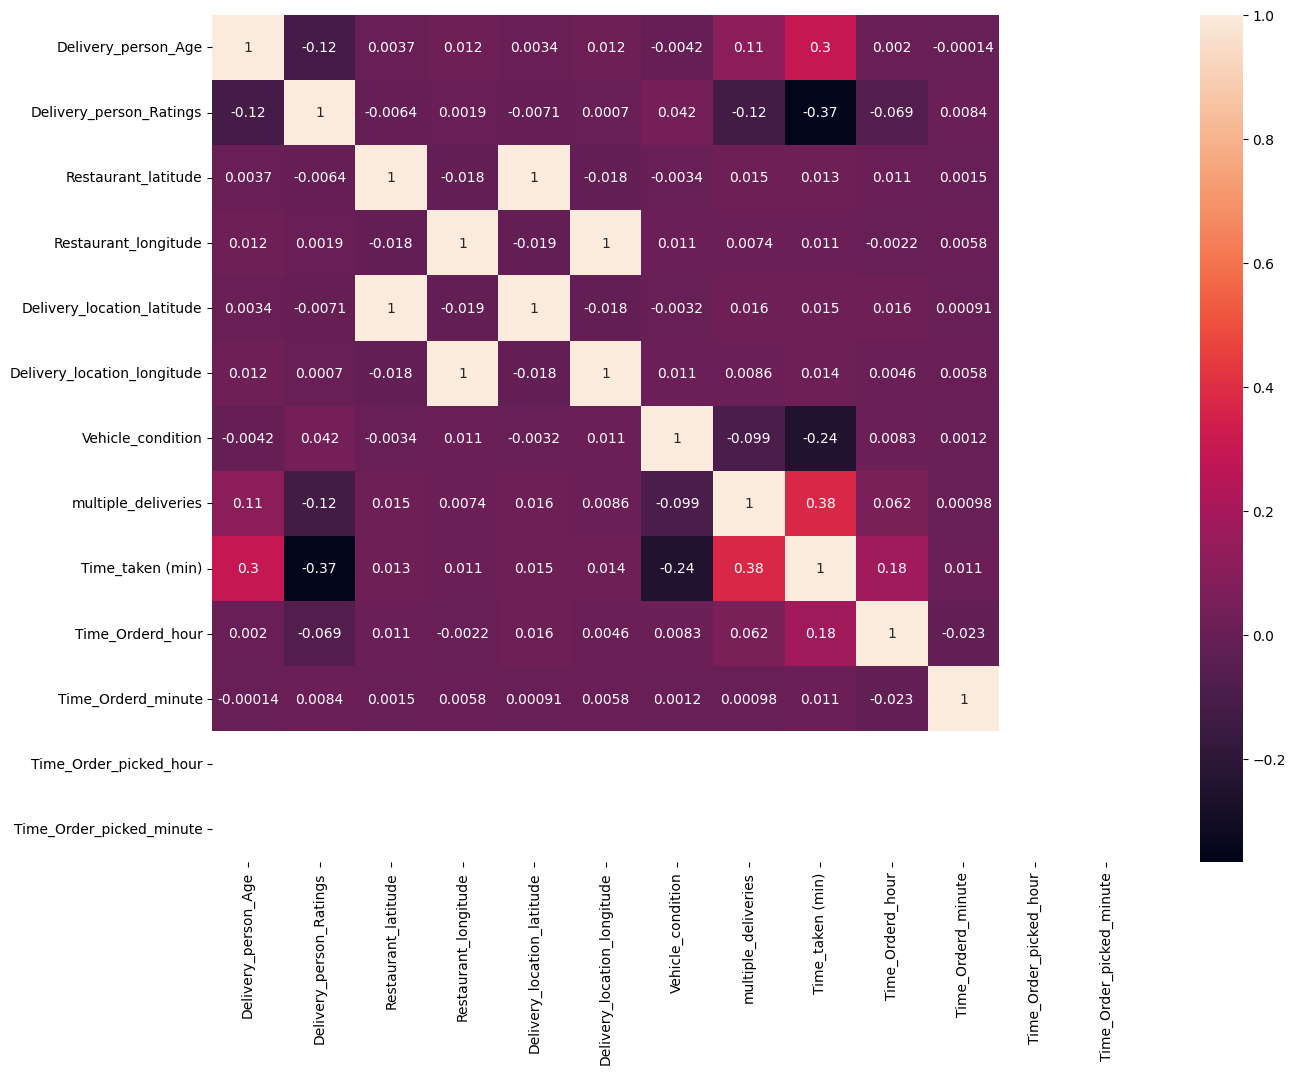

In [51]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [52]:
plt.figure(figsize=(5,3))

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

# Observations


1. The independant feature are other than time taken in mints
2. Time taken in dependant features
3. coordinate values are some parameters which may cause over fitting to model . I recommend converting these to onground distance instaed by scrapping maps.
4. we will implement there 2 model but will be using 1000 data points from processed CSV.
5. delivary person and vehicle condition are two indipendent features catagory is affecting dependant feature time taken negatively. Where as delivery person age and multiple delivery are positively affecting depenendt feature.

note - we can also keep dependant features as rating and time taken. but for now we will go ahed with time takne only


# hypothesis

A. case with delivey time and age of delivey person
1. H0:  person with age less than average age will take less time for delivery
2. H1:  [from the given dataset] The person with young age is not much affexting the delivery time. we reject the H0 prespective

A. case with delivey time and average rating of delivey person
1. H0:  person with rating less than average will take less time for delivery
2. H1:  [from the dataset] The person with good ratings is not much affexting the delivery time. we reject the H0 prespective

> same goes for weather condition and type of city etc



In [53]:
# building pipeline for project 

In [54]:
# processing categorical_columns data
for i in cat_features:
    print("column",i, ":", cat_features[i].unique(),"\n"," count : ", cat_features[i].unique().__len__())

column Weather_conditions : ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny'] 
  count :  6
column Road_traffic_density : ['Jam' 'High' 'Low' 'Medium'] 
  count :  4
column Type_of_order : ['Snack' 'Meal' 'Buffet' 'Drinks'] 
  count :  4
column Type_of_vehicle : ['motorcycle' 'scooter' 'electric_scooter'] 
  count :  3
column Festival : ['No' 'Yes'] 
  count :  2
column City : ['Metropolitian' 'Urban' 'Semi-Urban'] 
  count :  3


In [89]:
[['Snack' 'Meal' 'Buffet' 'Drinks'],['motorcycle' 'scooter' 'electric_scooter'] ,['Metropolitian' 'Urban' 'Semi-Urban'] ]

[['SnackMealBuffetDrinks'],
 ['motorcyclescooterelectric_scooter'],
 ['MetropolitianUrbanSemi-Urban']]

> applying numerical encoding to catagorical data

In [55]:
# can implement ranking encoding
weather = {"Fog" :1, "Stormy":2,"Sandstorms":3,"Windy":4, "Cloudy":5, "Sunny":6}

In [56]:
# can implement ranking encoding
traffic = {'Jam':4,'High':3,'Medium':2,'Low':1}

In [57]:
# can implement one hot encoding (or rank encoding)
# for food type

# it can be ranked on the basis of weight and complixity in carrying with care 

In [58]:
# can implement one hot encoding 
# for vehicle type

# it can be ranked on the basis of speed though
{'motorcycle':3, 'scooter':3, 'electric_scooter':2, 'bicycle':1}

{'motorcycle': 3, 'scooter': 3, 'electric_scooter': 2, 'bicycle': 1}

In [59]:
# simple binary 

festival = {'No':0, 'Yes':1}

In [60]:
df["Weather_conditions"] = df["Weather_conditions"].map(weather)

In [61]:
df["Road_traffic_density"] = df["Road_traffic_density"].map(traffic)
df["Festival"] = df["Festival"].map(festival)

In [62]:
df.to_csv("test.csv")

In [63]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1,4,2,Snack,motorcycle,3.0,0,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2,3,1,Meal,motorcycle,1.0,0,Metropolitian,23,14,55,22,10
2,34.0,4.3,30.899584,75.809346,30.919584,75.829346,3,1,0,Buffet,motorcycle,0.0,0,Metropolitian,20,9,20,22,10
3,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,4,1,Snack,scooter,1.0,0,Metropolitian,41,19,50,22,10
4,29.0,4.5,19.176269,72.836721,19.266269,72.926721,3,4,2,Buffet,electric_scooter,1.0,0,Metropolitian,20,20,25,22,10


In [64]:
# to handel missing values
from sklearn.impute import SimpleImputer 

# to handel feature scaling
from sklearn.preprocessing import StandardScaler

# for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

# to build pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [65]:
# create a OneHotEncoder object
onehot_encoder = OneHotEncoder()

In [66]:
# fit and transform the data using the OneHotEncoder
onehot_encoded = onehot_encoder.fit_transform(df[['Type_of_order', 'Type_of_vehicle', 'City']]).toarray()

# create a new DataFrame with the one-hot encoded data
df = pd.concat([df, pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out())], axis=1)
df = df.drop(labels = ['Type_of_order', 'Type_of_vehicle', 'City'] , axis = 1)

In [67]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1,4,2,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2,3,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,34.0,4.3,30.899584,75.809346,30.919584,75.829346,3,1,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,4,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,29.0,4.5,19.176269,72.836721,19.266269,72.926721,3,4,2,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


> from the data we can interpreate that the end objective is to find how much time it takes for an item delivey [dependent feature] from the dependent features like age, rating, weather condition, locations from point A and B and etc

>we will implementing 2 models 
1. One will be for nomal inpute of location data for point A and point B
2. Another will be a logical approach that is with respect to actual onground distance. 
    * only draw back is we will be considering 1000 elements out of 45000+ features coz it took 2.5 hr for scrapping max route distance from the maps via python. 
    * only distance we will be considering not the suggested time by maps coz that will be time dependent but it will vary with respect to the time when we collected data ]

# pipeline

In [68]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]
)

In [69]:
df1 = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\final_processed_data.csv")
# df1.info()

In [90]:
# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[weather, traffic, festival]), ['Weather_conditions', 'Road_traffic_density', 'Festival']),
    ('onehot', OneHotEncoder(categories=[['Snack' 'Meal' 'Buffet' 'Drinks'],['motorcycle' 'scooter' 'electric_scooter'] ,['Metropolitian' 'Urban' 'Semi-Urban'] ]), ['Type_of_order', 'Type_of_vehicle', 'City']),
    ('scaler',StandardScaler())
    ]

)

In [91]:
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,num_features),
('cat_pipeline',cat_pipeline,cat_features)
])

In [92]:
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          24728 non-null  float64
 1   Delivery_person_Ratings      24728 non-null  float64
 2   Restaurant_latitude          24728 non-null  float64
 3   Restaurant_longitude         24728 non-null  float64
 4   Delivery_location_latitude   24728 non-null  float64
 5   Delivery_location_longitude  24728 non-null  float64
 6   Weather_conditions           24728 non-null  object 
 7   Road_traffic_density         24728 non-null  object 
 8   Vehicle_condition            24728 non-null  int64  
 9   Type_of_order                24728 non-null  object 
 10  Type_of_vehicle              24728 non-null  object 
 11  multiple_deliveries          24728 non-null  float64
 12  Festival                     24728 non-null  object 
 13  City            

# train test split

In [93]:
# df = df.drop(labels=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"] , axis=1)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
df_copy = df.copy()
# df_copy = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\final_processed_data.csv")

# df_copy = df.drop(index = 0,axis=1)


In [96]:
df_copy.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,22,10
2,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,20,22,10
3,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,22,10
4,29.0,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,25,22,10


In [97]:
X = df_copy.drop("Time_taken (min)" , axis = 1)


In [98]:
y = pd.DataFrame(df_copy["Time_taken (min)"])

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          24728 non-null  float64
 1   Delivery_person_Ratings      24728 non-null  float64
 2   Restaurant_latitude          24728 non-null  float64
 3   Restaurant_longitude         24728 non-null  float64
 4   Delivery_location_latitude   24728 non-null  float64
 5   Delivery_location_longitude  24728 non-null  float64
 6   Weather_conditions           24728 non-null  object 
 7   Road_traffic_density         24728 non-null  object 
 8   Vehicle_condition            24728 non-null  int64  
 9   Type_of_order                24728 non-null  object 
 10  Type_of_vehicle              24728 non-null  object 
 11  multiple_deliveries          24728 non-null  float64
 12  Festival                     24728 non-null  object 
 13  City            

In [100]:
X.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,14,55,22,10
2,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,9,20,22,10
3,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,19,50,22,10
4,29.0,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,25,22,10


In [101]:
y.head()

,Time_taken (min)
0,46
1,23
2,20
3,41
4,20


In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [103]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17309, 18), (7419, 18), (17309, 1), (7419, 1))

In [104]:
preprocessor = ColumnTransformer(
    transformers=[        ('ordinalencoder',OrdinalEncoder(categories=[weather, traffic, festival]), ['Weather_conditions', 'Road_traffic_density', 'Festival']),
                            ('onehot', OneHotEncoder(), ['Type_of_order', 'Type_of_vehicle', 'City']),
    ])

In [105]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())    




IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

# model trainer

In [356]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [357]:
# regression = LinearRegression() # object of model

# regression.fit(X_train,y_train)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

# create an instance of the LinearRegression class
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# predict the output for the test data
y_pred = model.predict(X_test)

In [358]:
model.coef_

array([[ 3.65225371e-01, -7.61453997e+00, -6.11088050e-01,
         2.34792332e+00, -2.15886813e+00,  3.50588818e+00,
         1.04098174e+01,  1.45269037e-01,  1.73254828e-03,
         4.44089210e-15, -1.99840144e-15,  6.71000324e-03,
        -7.23928471e-03,  2.45812447e-02, -2.40519633e-02,
         5.03919879e-01, -4.23989556e-02, -4.61520924e-01,
        -2.62032357e+00,  7.66777659e+00, -5.04745302e+00]])

In [359]:
def evaluate_model(true,predict):
    mae = mean_absolute_error(true,predict)
    msa = mean_squared_error(true,predict)
    r2 = r2_score(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    return mae, msa, rmse, r2


# model dictonary
models_dict={ 
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet()
}

In [360]:
# empty variables

train_model_list = list()
model_list = dict()
r2_list = list()

In [361]:
# loops 

for i in models_dict.values():
    models = i
    models.fit(X_train,y_train)

    # predictions
    y_pred  = models.predict(X_test)

    mae, msa, rmse, r2_square=evaluate_model(y_test,y_pred)
    
    print("Model name : ", i)
    print("---"*10)

    
    print('Model Training Performance')
    print("- - - "*5)
    print("RMSE:",rmse)
    print("MSA:",msa)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    r2_list.append(r2_square*100)
    print("- - - "*5)
    print('='*35)
    print('\n')
    model_list[i]=(r2_square*100)

    
for i in model_list:
    if model_list[i]==max(r2_list):
        print(i)
        train_model_list.append((i,model_list[i]))

print([i for i in model_list],"\n",train_model_list,"\n",r2_list)



Model name :  LinearRegression()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 6.4848341627213335
MSA: 42.0530741179977
MAE: 5.150446032919876
R2 score 51.258791909452285
- - - - - - - - - - - - - - - 


Model name :  Lasso()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 7.448127916996225
MSA: 55.47460946793853
MAE: 5.984558380972243
R2 score 35.70269140772622
- - - - - - - - - - - - - - - 


Model name :  Ridge()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 6.484724478540943
MSA: 42.051651562588106
MAE: 5.150443731484214
R2 score 51.260440708516185
- - - - - - - - - - - - - - - 


Model name :  ElasticNet()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 7.471349070127962
MSA: 55.82105692770196
MAE: 5.998993949147776
R2 score 35.30114483632957
- - - - - - - - - - - - - - - 


Ridge()
[LinearRe

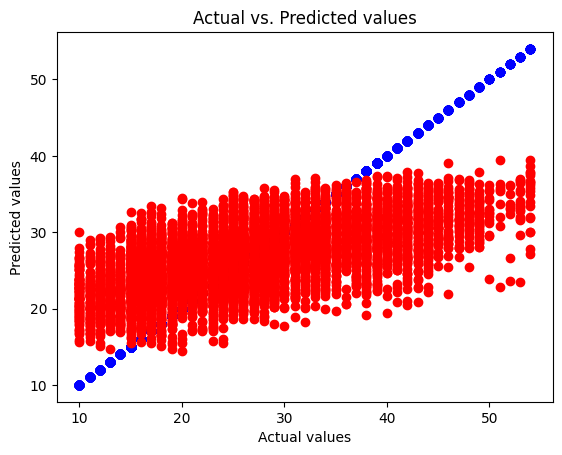

In [362]:
import matplotlib.pyplot as plt

# plot the actual values
plt.scatter(y_test, y_test, color='blue')

# plot the predicted values
plt.scatter(y_test, y_pred, color='red')

# add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')

# show the plot
plt.show()


In [425]:
num_features.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_Orderd_hour',
       'Time_Orderd_minute', 'Time_Order_picked_hour',
       'Time_Order_picked_minute'],
      dtype='object')

<AxesSubplot: xlabel='Delivery_person_Age'>

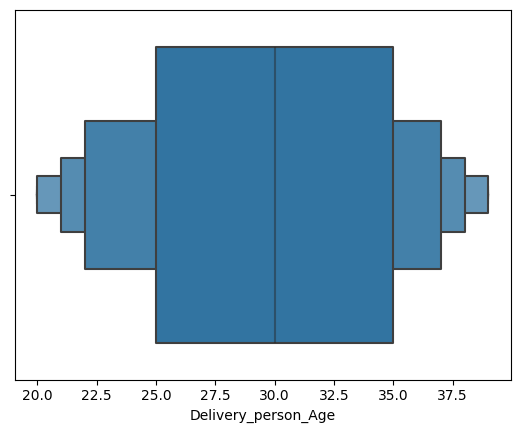

In [443]:
sns.boxenplot(x = df['Delivery_person_Age'])